In [1]:
# Importing all the essential Python libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
!pip install pandas_datareader

In [5]:
 import pandas_datareader.data as web

In [6]:
from datetime import datetime

In [7]:

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [8]:
web

<module 'pandas_datareader.data' from 'C:\\Users\\Abhishek kumar\\anaconda3\\lib\\site-packages\\pandas_datareader\\data.py'>

In [9]:
TSLA = web.DataReader('TSLA','yahoo',start,end)

In [10]:
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-22,146.800003,137.742004,140.796005,146.421997,70827500.0,146.421997
2020-04-23,146.800003,140.626007,145.520004,141.126007,66183500.0,141.126007
2020-04-24,146.145996,139.636002,142.162003,145.029999,66060000.0,145.029999
2020-04-27,159.897995,147.000000,147.522003,159.750000,103407000.0,159.750000
2020-04-28,161.000000,151.337997,159.128006,153.824005,76110000.0,153.824005


In [11]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-04-22 to 2021-04-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [12]:
TSLA.isnull()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-22,False,False,False,False,False,False
2020-04-23,False,False,False,False,False,False
2020-04-24,False,False,False,False,False,False
2020-04-27,False,False,False,False,False,False
2020-04-28,False,False,False,False,False,False
...,...,...,...,...,...,...
2021-04-16,False,False,False,False,False,False
2021-04-19,False,False,False,False,False,False
2021-04-20,False,False,False,False,False,False


In [13]:
TSLA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,487.628830,462.651146,476.000815,476.392102,5.500313e+07,476.392102
std,226.895604,217.393455,222.782394,222.705544,3.038547e+07,222.705544
min,146.145996,136.608002,140.199997,140.264008,1.515770e+07,140.264008
25%,303.462006,287.000000,297.600006,297.399994,3.317300e+07,297.399994
50%,439.130005,421.250000,436.092010,429.950012,4.647500e+07,429.950012
75%,691.380005,655.059998,674.510010,670.000000,7.129120e+07,670.000000
max,900.400024,871.599976,891.380005,883.090027,2.221262e+08,883.090027


<AxesSubplot:xlabel='Date'>

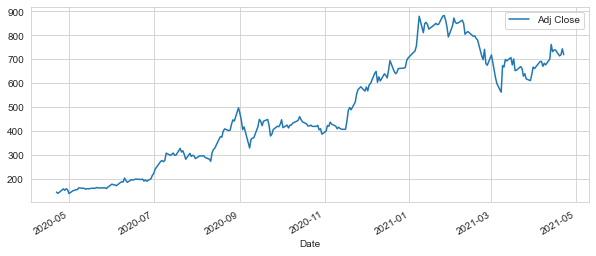

In [14]:
# Plotting Adjusted Closing price for Tesla Motors Stock

TSLA['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

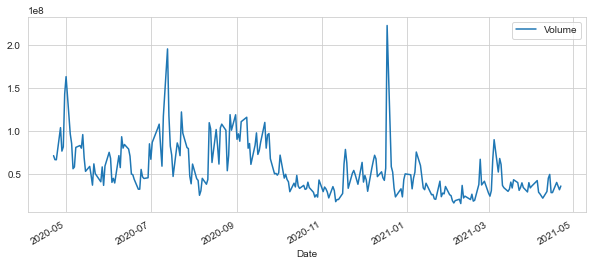

In [15]:
# Plotting the total volume of stock being traded each day

TSLA['Volume'].plot(legend=True,figsize=(10,4))

In [16]:
TSLA['100ma'] = TSLA['Adj Close'].rolling(window=100,min_periods=0).mean()
print(TSLA.head())

                  High         Low        Open       Close       Volume  \
Date                                                                      
2020-04-22  146.800003  137.742004  140.796005  146.421997   70827500.0   
2020-04-23  146.800003  140.626007  145.520004  141.126007   66183500.0   
2020-04-24  146.145996  139.636002  142.162003  145.029999   66060000.0   
2020-04-27  159.897995  147.000000  147.522003  159.750000  103407000.0   
2020-04-28  161.000000  151.337997  159.128006  153.824005   76110000.0   

             Adj Close       100ma  
Date                                
2020-04-22  146.421997  146.421997  
2020-04-23  141.126007  143.774002  
2020-04-24  145.029999  144.192668  
2020-04-27  159.750000  148.082001  
2020-04-28  153.824005  149.230402  


<AxesSubplot:xlabel='Date'>

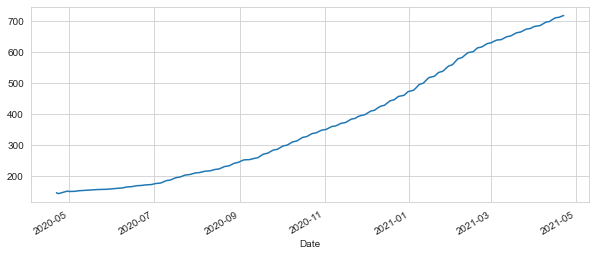

In [17]:
TSLA['100ma'].plot(figsize=(10,4))

<AxesSubplot:xlabel='Date'>

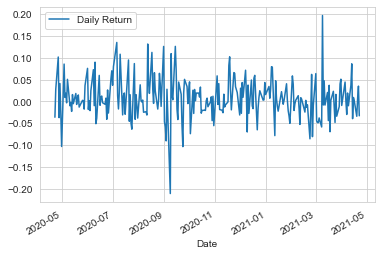

In [18]:
# Plotting Daily returns as a function of Percent change in Adjusted Close value

TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()

TSLA['Daily Return'].plot(legend=True)

C:\Users\Abhishek kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

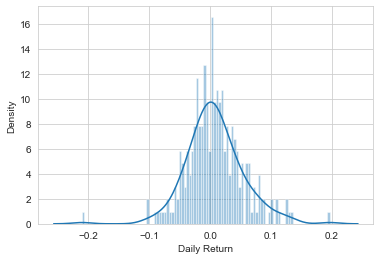

In [19]:
# Plotting the average daily returns of the stock

sns.distplot(TSLA['Daily Return'].dropna(),bins=100)

Text(0, 0.5, 'Risk')

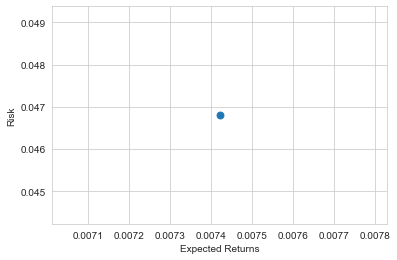

In [20]:
# Risk Analysis --  Comparing the Risk vs Expected returns

rets = TSLA['Daily Return'].dropna()

area = np.pi*15

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

C:\Users\Abhishek kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

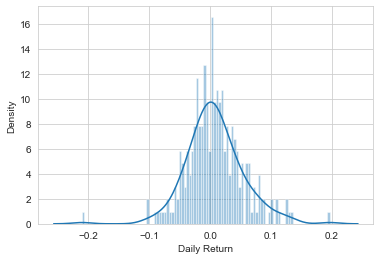

In [21]:
# Visualizing the Value at Risk

sns.distplot(TSLA['Daily Return'].dropna(),bins=100)

In [22]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

TSLA['Daily Return'].quantile(0.05)

-0.058349520343282266

In [23]:
## Monte Carlo Simulation

days = 365

dt = 1/days

mu = rets.mean()

sigma = rets.std()

In [24]:
# Defining the Monte Carlo Simulation Function

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

In [25]:
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close,100ma,Daily Return
Date,,,,,,,,
2020-04-22,146.800003,137.742004,140.796005,146.421997,70827500.0,146.421997,146.421997,NaN
2020-04-23,146.800003,140.626007,145.520004,141.126007,66183500.0,141.126007,143.774002,-0.036169
2020-04-24,146.145996,139.636002,142.162003,145.029999,66060000.0,145.029999,144.192668,0.027663
2020-04-27,159.897995,147.000000,147.522003,159.750000,103407000.0,159.750000,148.082001,0.101496
2020-04-28,161.000000,151.337997,159.128006,153.824005,76110000.0,153.824005,149.230402,-0.037095


Text(0.5, 1.0, 'Monte Carlo Simulation for Tesla Motors')

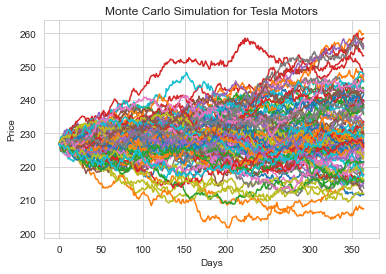

In [26]:
# Running the Monte Carlo simulation a hundred times

start_price = 226.899994

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for Tesla Motors')

In [27]:

# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
# 1 percent impirical quantile or 99% Confidence Interval

q = np.percentile(simulations,1)

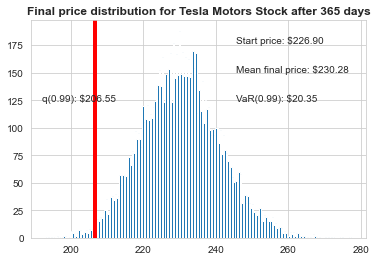

In [28]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Tesla Motors Stock after %s days" % days, weight='bold');